In [ ]:
!pip install sjmisc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sjmisc (from versions: none)
ERROR: No matching distribution found for sjmisc


In [19]:
import pandas as pd
import numpy as np 

In [20]:
#code to work with data in google collab
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [21]:
df = pd.read_csv("cleaned_data.csv")

In [22]:
df = df[["reviewText","reviewScoreOverall"]]

In [23]:
df.head()

,reviewText,reviewScoreOverall
0,Heerlijk eten en leuke sfeer. Veel keuze bij h...,9.0
1,Met z'n vieren dit restaurant bezocht. We hadd...,10.0
2,Snel gegeten tijdens een plotselinge bezoek na...,7.5
3,Wait to be seated! We moesten lang wachten.Ont...,2.5
4,Wij zijn volgens ons afspraak om 18.00 uur daa...,3.0


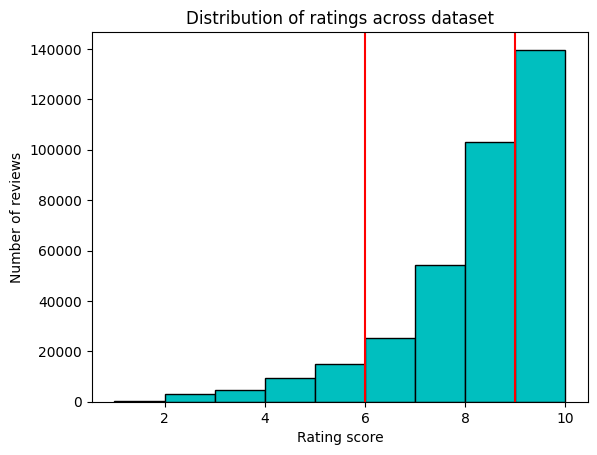

In [24]:
import matplotlib.pyplot as plt

plt.hist(df["reviewScoreOverall"], bins = 9, color="c", edgecolor="k")
plt.xlabel("Rating score")
plt.ylabel("Number of reviews")
plt.title("Distribution of ratings across dataset")
plt.axvline(6, color="r")
plt.axvline(9,color="r")

In [25]:
import numpy as np 

conditions = [
    (df['reviewScoreOverall'] <= 6),
    (df['reviewScoreOverall'] >= 9) 
    ]

values = ["negative", "positive"]

# create a new column and use np.select to assign values to it using our lists as arguments
df['LABEL_COLUMN'] = np.select(conditions, values)

In [26]:
df = df[df["LABEL_COLUMN"] != "0"]
print(df["LABEL_COLUMN"].value_counts())
print(df.head())

positive    139715
negative     40723
Name: LABEL_COLUMN, dtype: int64
                                          reviewText  reviewScoreOverall  \
0  Heerlijk eten en leuke sfeer. Veel keuze bij h...                 9.0   
1  Met z'n vieren dit restaurant bezocht. We hadd...                10.0   
3  Wait to be seated! We moesten lang wachten.Ont...                 2.5   
4  Wij zijn volgens ons afspraak om 18.00 uur daa...                 3.0   
5                                  Heerlijk gegeten!                 9.0   

  LABEL_COLUMN  
0     positive  
1     positive  
3     negative  
4     negative  
5     positive  


In [27]:
df.head()

,reviewText,reviewScoreOverall,LABEL_COLUMN
0,Heerlijk eten en leuke sfeer. Veel keuze bij h...,9.0,positive
1,Met z'n vieren dit restaurant bezocht. We hadd...,10.0,positive
3,Wait to be seated! We moesten lang wachten.Ont...,2.5,negative
4,Wij zijn volgens ons afspraak om 18.00 uur daa...,3.0,negative
5,Heerlijk gegeten!,9.0,positive


In [29]:

path = '/content/drive/MyDrive/preprocessed_data.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)